# Statistical Analysis of Loan Prediction

In [388]:
# Load librarys
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [389]:
# Load in data

train = pd.read_csv('/home/kevin/Downloads/Loan Predict/train.csv')
test = pd.read_csv('/home/kevin/Downloads/Loan Predict/test.csv')

In [390]:
# Check summary of data

print train.describe()

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000         NaN               NaN   
50%        3812.500000        1188.500000         NaN               NaN   
75%        5795.000000        2297.250000         NaN               NaN   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%               NaN  
50%               NaN  
75%               NaN  
max          1.000000  


In [391]:
# Compare describe counts versus shape to check if missing data / NA's present

print train.shape 



(614, 13)


From the summary statitics we can tell that 84% of ppl have credit scores from the mean because the mean is an identifier variable (between 0 and 1)

It can also been seen that a few variables are missing data as they do not have the same count as the number of rows: Loan Amount, Loan Amount Term and Credit History.

The skew of each variable can also be determined: compare mean to median 
if mean is to right of median right skew, to the left, left skew, around the same normally distributed 

In [392]:
# Lets look at groupings of objects within variables with a frequency table
# Similar to finding out counts of factors with R

print train['Property_Area'].value_counts() # or train.Property_Area.value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [393]:
# Semi urban is the most popular, followed by urban the rural
# But all are close together with a spread of 233 - 179: 54

print train['Property_Area'].value_counts().describe()['max']-train.Property_Area.value_counts().describe()['min']

54.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bd485fe90>]], dtype=object)

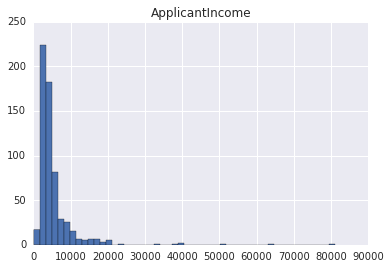

In [394]:
# Lets look at some distributions of the data

train.hist(column='ApplicantIncome',bins=50)

The data looks like it has a heavy right tail.
By using a boxplot we can achieve a seperate view of the outliers
Remember outliers are  outside of the Inner lower fence: Q1 – 1.5×IQR and above the Inner upper fence: Q3 + 1.5×IQR

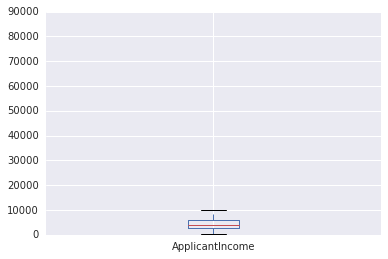

In [395]:
# Box plot

train.boxplot(column='ApplicantIncome', return_type='axes')

In [396]:
# To get a better idea of where these outliers are coming we can isolate catergorical variables (object type)

train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

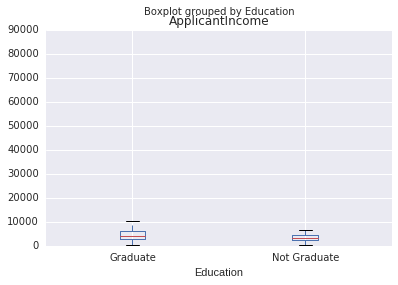

In [397]:
# Does education level affect income?

train.boxplot(column='ApplicantIncome',by='Education')

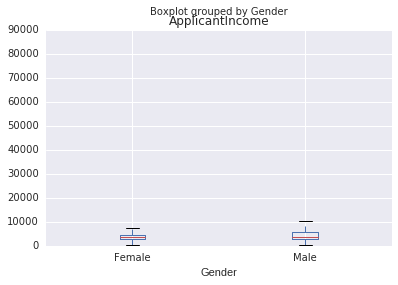

In [398]:
# Gender?
train.boxplot(column='ApplicantIncome', by='Gender')

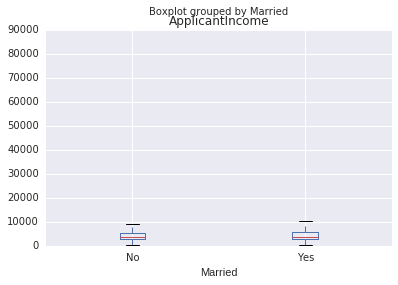

In [399]:
# Marriage?

train.boxplot(column='ApplicantIncome', by='Married')

Seems as if married male graduates would account for the majority of the outliers

In [400]:
# There seems to be a pattern that educated earn more
# Lets get some calulations

print train.groupby('Education')['ApplicantIncome'].describe()
print 

# And check the differences
print "Differences:"
print train.groupby('Education')['ApplicantIncome'].describe()['Graduate']-train.groupby('Education')['ApplicantIncome'].describe()['Not Graduate']

Education          
Graduate      count      480.000000
              mean      5857.433333
              std       6739.797954
              min        150.000000
              25%       2998.750000
              50%       4000.000000
              75%       6068.750000
              max      81000.000000
Not Graduate  count      134.000000
              mean      3777.283582
              std       2237.081586
              min        210.000000
              25%       2583.000000
              50%       3357.500000
              75%       4333.000000
              max      18165.000000
Name: ApplicantIncome, dtype: float64

Differences:
count      346.000000
mean      2080.149751
std       4502.716367
min        -60.000000
25%        415.750000
50%        642.500000
75%       1735.750000
max      62835.000000
Name: ApplicantIncome, dtype: float64


In [401]:
# Lets find out what characteristics the top earners have
# Rather than above Q3 + 1.5IQR as it is not very large it might be better to compare against 40% of the max
want = train['ApplicantIncome'][train.ApplicantIncome > 0.4*train.ApplicantIncome.max()].index
train.iloc[want]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


This confirms the outliers / top earners are indeed Educated, Male, and mostly likely married

In [402]:
# Continuing on the search for outliers we should check out the other numerical variables
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bd522c490>]], dtype=object)

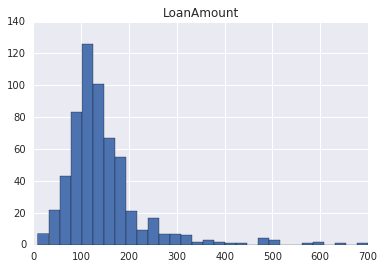

In [403]:
# As credit history is an identifier variables
# And Loan_Amount_Term doesn't vary much
# We're left with LoanAmount
train.hist(column='LoanAmount', bins=30)

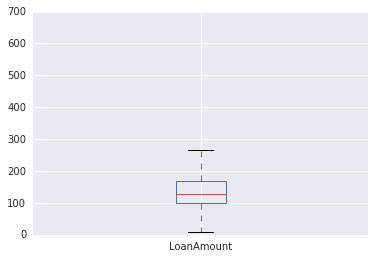

In [404]:
# Take a look at the boxplot
train.boxplot(column='LoanAmount', return_type='axes')

In [405]:
# Lets move on to the categorical variables
# First make a frequency table for credit history (taking counts of each factor)
# Then lets change the loan status Y to 1 and N to 0 and put into a pivot table for analysis

temp1 = train.Credit_History.value_counts(ascending=True)
temp2 = train.pivot_table(values='Loan_Status',index=['Credit_History'], aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())

print "Credit Hist Freq tab:"
print temp1

print "\nLoan Status Prob if credit hist complete:"
print temp2

Credit Hist Freq tab:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Loan Status Prob if credit hist complete:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


If your credit history is complete you have almost a 80% chance of getting a loan

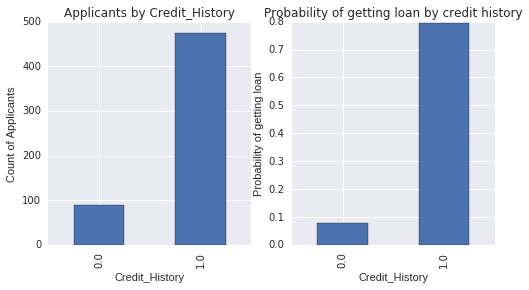

In [406]:
# Making side by side bar charts to visualize the data

# Make the blank canvas
fig = plt.figure(figsize=(8,4))
# Create sub plot sections consisting of 1 row, 2 columns then place ax1 graph in the first position
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
# Plot freq data
temp1.plot(kind = 'bar')

# Second plot
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
temp2.plot(kind ='bar')

If your history report is complete you have approx 8X the chance of getting approved for a loan

In [407]:
# Do the same for education

temp3 = train.Education.value_counts(ascending=True)
temp4 = train.pivot_table(values='Loan_Status',index=['Education'], aggfunc = lambda x: x.map({'Y':1,'N':0}).mean())

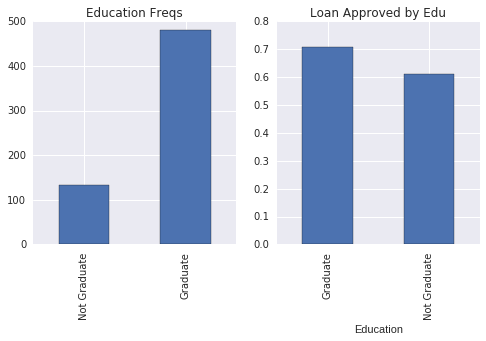

In [408]:
fig2 = plt.figure(figsize=(8,4))
ax1= fig2.add_subplot(121)
ax1.set_title('Education Freqs')
temp3.plot(kind = 'bar')

ax2 = fig2.add_subplot(122)
ax2.set_title('Loan Approved by Edu')
temp4.plot(kind = 'bar')

Education doesn't seem to have a large difference on loan approval rating 

# Machine Learning

In [409]:
# As we noticed eariler there were missing values in the data set
# We should find where they are

train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [410]:
# Filling in the na's for LoanAmount using the mean

train.LoanAmount.fillna(train['LoanAmount'].mean(),inplace=True)

In [411]:
sum(train.LoanAmount.isnull())

0

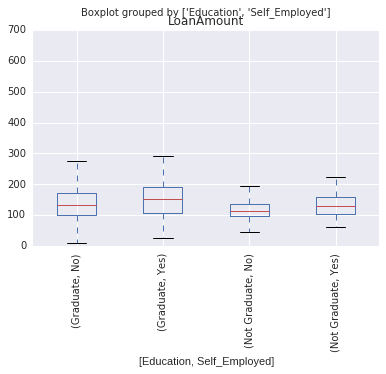

In [412]:
# Checking hypothesis that whether someone is educated or self employed
# Correlates to the loan amount they get
train.boxplot(column='LoanAmount',by=['Education','Self_Employed'],rot=90)

In [413]:
sum(train.Self_Employed.isnull())

32

In [414]:
# Need to replace the Na's
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [415]:
# The majority of answers is No so it should be safe to replace with No
train.Self_Employed.fillna('No',inplace=True)

In [416]:
# Lets make a pivot table again with median values 
# for all the groups of unique values 
# of Self_Employed and Education features.

table = train.pivot_table(values='LoanAmount', index='Self_Employed',columns='Education', aggfunc=np.median)

In [417]:
table

Education,Graduate,Not Graduate
Self_Employed,,
No,131.0,115.0
Yes,152.0,130.0


In [418]:
# Define a function to return the value of the pivot table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]


In [419]:
# Replace missing values with median values
train.fillna(train[train['LoanAmount'].isnull()].apply(fage, axis=1),inplace=True)

In [420]:
sum(train.LoanAmount.isnull())

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bd45c7610>]], dtype=object)

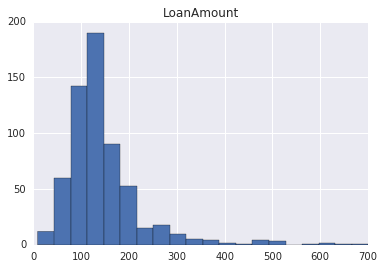

In [421]:
train.hist(column='LoanAmount', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bd4d9d0d0>]], dtype=object)

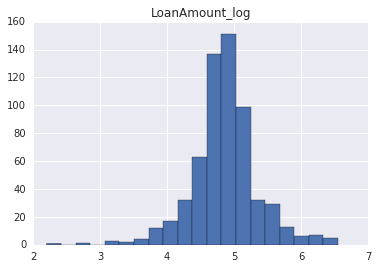

In [422]:
# Loan amount still has a right skewed distribution
# Its plasuable for some to want larger loans so they should not be treated as outliers
# Perhaps take the log of the loan amounts to make it more centric
train['LoanAmount_log']=np.log(train['LoanAmount'])
train.hist(column='LoanAmount_log', bins=20)

(array([   1.,    0.,    1.,    0.,    5.,    2.,   10.,   18.,   34.,
          40.,  131.,  138.,  106.,   62.,   27.,   17.,    7.,    6.,
           5.,    4.]),
 array([ 2.386645  ,  2.68920137,  2.99175774,  3.29431411,  3.59687048,
         3.89942685,  4.20198322,  4.50453959,  4.80709596,  5.10965233,
         5.41220869,  5.71476506,  6.01732143,  6.3198778 ,  6.62243417,
         6.92499054,  7.22754691,  7.53010328,  7.83265965,  8.13521602,
         8.43777238]),
 <a list of 20 Patch objects>)

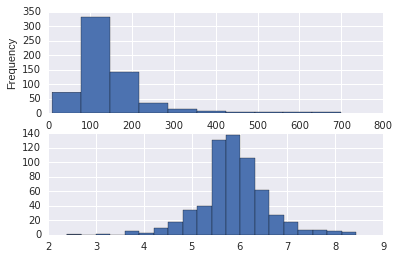

In [423]:
# In the interest of finding a better approach let's try the Box Cox Test
from scipy import stats

fig = plt.figure()
ax1 = fig.add_subplot(211)
train.LoanAmount.plot(kind='hist')

ax2 = fig.add_subplot(212)
boxcox, _ = stats.boxcox(train.LoanAmount)
plt.hist(boxcox, bins=20)



Box Cox does a test to check the relation of variance VS mean of the data and outputs this number as the optimal power transformation.

-1. is a reciprocal
-.5 is a recriprocal square root
0.0 is a log transformation
.5 is a square toot transform and
1.0 is no transform.

Source: http://stats.stackexchange.com/questions/18844/when-and-why-to-take-the-log-of-a-distribution-of-number

In [424]:
# Lets examine the optimal power number 
# First calculate Box-Cox log-likelihood values for them for a range of lmbda values
# Then get the best log likelihood for a range of lambdas

# Create an array between -2,2
l = np.linspace(-2,2,int(train.LoanAmount.shape[0]))
# Create an empty array the same size as the one above
llf = np.zeros(l.shape, dtype=np.float)
for i, lmbda in enumerate(l):
    llf[i] = stats.boxcox_llf(lmbda, train.LoanAmount)

<function matplotlib.pyplot.show>

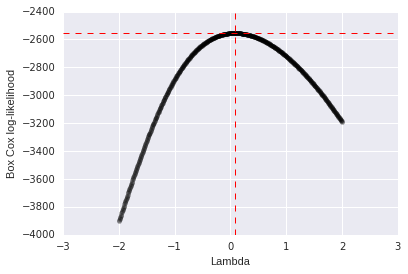

In [425]:
x_most_normal, lmbda_optimal = stats.boxcox(train.LoanAmount)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(l, llf, marker='o',alpha=0.3,c='k')
ax.axhline(stats.boxcox_llf(lmbda_optimal, train.LoanAmount), color='r', linestyle='dashed',linewidth=1)
ax.axvline(lmbda_optimal, color='r', linestyle='dashed', linewidth=1)
ax.set_xlabel('Lambda')
ax.set_ylabel('Box Cox log-likelihood')
plt.show

From above we can see that lambda from the Box Cox test is around 0 so by taking the log of the data it will become approximately Normal

Source: http://gildrops.com/box-cox-transformation-for-normalizing-data/
        http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.boxcox_llf.html

In [426]:
# Putting the Loan Amounts Boxcox values into the data frame
train['LoanBox']=boxcox

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bd3f7d410>]], dtype=object)

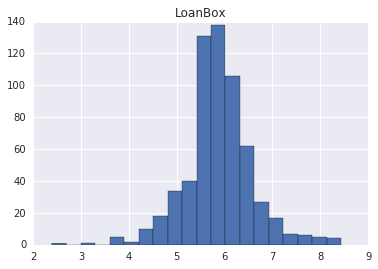

In [427]:
# Addtional Check
train.hist(column='LoanBox',bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bd3d73d50>]], dtype=object)

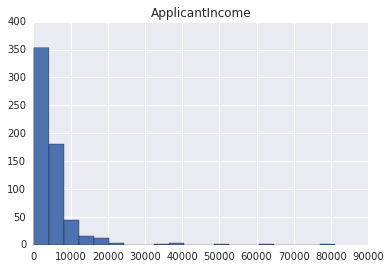

In [428]:
# Next we should focus on Applicant Income and Co-Applicant Income
# Combine them as one for a total income column
# Then perform boxcox again
train.hist('ApplicantIncome', bins=20)

In [429]:
# Make a box it function to quickly give a before and after chart 
def boxitcompare(series):

    from scipy import stats
    import numpy as np
    
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(131)
    ax1.set_title('Original')
    series.plot(kind='hist', bins=20,rot=90)

    ax2 = fig.add_subplot(132)
    ax2.set_title('Box Cox')
    boxcox, _ = stats.boxcox(series)
    plt.hist(boxcox, bins=20)
    plt.xticks(rotation = 90)
    
    ax3 = fig.add_subplot(133)
    ax3.set_title('Logged')
    logged = np.log(series)
    plt.hist(logged,bins=20)
    plt.xticks(rotation = 90)
    

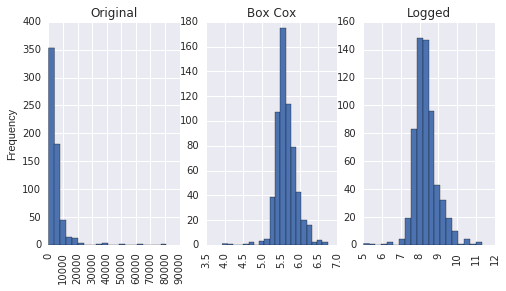

In [430]:
# Lets compare methods
boxitcompare(train.ApplicantIncome)

In [431]:
# Looks like logged seems the closet to normal
train['ApplicantIncome_log'] = np.log(train.ApplicantIncome)

In [432]:
# As we noticed eariler there were missing values in the data set
# Lets remind ourselves where they are

train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
LoanAmount_log          0
LoanBox                 0
ApplicantIncome_log     0
dtype: int64

In [433]:
# Deal with gender first
print "Value counts:\n"  
print train.Gender.value_counts()
print
print "Total in gender: " + str(train.Gender.count())

Value counts:

Male      489
Female    112
Name: Gender, dtype: int64

Total in gender: 601


In [434]:
# While the majority seem male and it would be safe to fill all na's with male
# i.e train.Gender.fillna('Male',inplace=True)
# Practice on a copy of gender
gends = train.Gender.copy()
gends = gends.fillna('Male')
print sum(gends.isnull())


0


In [435]:
# A better option might be to use a random forest classifier to determine the gender based off of 
# Trends from other characteritics 

# Import Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

# Prep the data
# Want values where the gender is present (training data)
traincopy = train.copy()
traincopy = traincopy[traincopy.Gender.notnull()]
# VS values where not present (test data)
traincopy2 = train.copy()
traincopy2 = traincopy2[traincopy2.Gender.isnull()]
# Take all numerical features to be analyzied by
traincopy2 = traincopy2.iloc[:,[1,6,7,8]]
# Lets take all the numerical features i.e Applicant Income
# Loan amount and Coapplicant Income
features = traincopy.columns[6:9]
# Need to turn the string into ints
# Make 0 rep male and 1 rep female through pd.factorize
y, _ = pd.factorize(traincopy['Gender'])
# Create initial model
model = RandomForestClassifier(n_estimators=500)
# Fit the model on the original data
model.fit(traincopy[features],y)
# Get predictions on blank data
preds = model.predict(traincopy2[features])
preds

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [436]:
# Looks like a single one of them is likely to be a woman or none of them are woman
# Not much of a difference than just making all male
# Can't directly fillna with a numpy array so just loop through
for i in preds:
    train.Gender.fillna(preds[i],inplace=True)

In [437]:
# Sanity check
sum(train.Gender.isnull())

0

In [438]:
#  Now do the data frame
pd.options.mode.chained_assignment = None  # default='warn'
for i, s in enumerate(train.Gender):
    if s == 'Male':
        train.Gender.iloc[i] = 0
    elif s == 'Female':
        train.Gender.iloc[i] = 1

In [439]:
train.Gender.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    0
19    0
Name: Gender, dtype: object

In [440]:
# Check what's left to fill
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID                 0
Gender                  0
Married                 3
Dependents             15
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
LoanAmount_log          0
LoanBox                 0
ApplicantIncome_log     0
dtype: int64

In [441]:
# Only 3 Married are NA
# Check counts and fill with most common
print train.Married.value_counts()
train.Married = train.Married.fillna('Yes')
print sum(train.Married.isnull())

Yes    398
No     213
Name: Married, dtype: int64
0


In [442]:
# Check out dependant amounts
print train.Dependents.value_counts()
print train.Dependents.describe()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object


In [443]:
# A better option might be to use a random forest classifier to determine the gender based off of 
# Trends from other characteritics 

# Since this process is randomized we should set a seed to insure consistent results
# Set a seed to get consistent results
   
import random
random.seed(134)
    
# Lets make a function for this
# Import Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier

def predictnas(var):
    # Should check if data is available i.e hasn't already been filled
    # If the data has been filled with provide an error otherwise
    
    traincopy2 = train.copy()
    if sum(traincopy2[var].isnull()) == 0:
        return "No NA's present, pick another variable"
    # Prep the data
    # Want values where the gender is present (training data)
    traincopy = train.copy()
    traincopy = traincopy[traincopy[var].notnull()]
    # VS values where not present (test data)
    traincopy2 = traincopy2[traincopy2[var].isnull()]
    # Take all numerical features to be analyzied by
    traincopy2 = traincopy2.iloc[:,[1,6,7,8]]
    # Lets take all the numerical features i.e Applicant Income
    # Loan amount and Coapplicant Income
    features = traincopy.columns[6:9]
    # Need to turn the string into ints
    # Make 0 rep male and 1 rep female through pd.factorize
    y, _ = pd.factorize(traincopy[var])
    # Create initial model
    model = RandomForestClassifier(n_estimators=500)
    # Fit the model on the original data
    model.fit(traincopy[features],y)
    # Get predictions on blank data
    preds = model.predict(traincopy2[features])
    return preds

predictnas('Dependents')

array([1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [444]:
# Let's factorize everything to get a better random forest result
# Get rid of the Load ID column first 
IDs = traincopy.Loan_ID.copy()
traincopy.drop('Loan_ID', axis=1, inplace=True)
for (train_name, train_series) in traincopy.iteritems():
    if (train_series.dtype == 'O'):
        #for objects: factorize
        traincopy[train_name], tmp_indexer = pd.factorize(traincopy[train_name])
traincopy['Loan_ID']=IDs

In [445]:
# Instead of just factorizing the variable to be filled
# Might be able to get more accurate results factorizing all variables and using
# Them to predict the NA's
# factorizePD factorize all columns that are objects 

from sklearn.ensemble import RandomForestClassifier

def predictnas(var):
    
    # First take values where var is NA (test data)
    traincopy2 = train.copy()
    traincopy2 = traincopy2[traincopy2[var].isnull()]
    # Drop loan id as it is an object, but not a factor
    traincopy2.drop('Loan_ID', axis=1, inplace=True)
    
    # Should check if data is available i.e hasn't already been filled
    # If the data has been filled with provide an error otherwise
    if sum(traincopy2[var].isnull()) == 0:
        return "No NA's present, pick another variable"
    
    # Prep the data
    # Want values where the gender is present (training data)
    
    traincopy = train.copy()
    traincopy = traincopy[traincopy[var].notnull()]
    traincopy.drop('Loan_ID', axis=1, inplace=True)
    
           
    # Factorize train and test data
    
    traincopy = factorizePD(traincopy)
    traincopy2 = factorizePD(traincopy2)
        
    # Want the factorized version to test around 
    y, _= pd.factorize(traincopy[var])
    # Take all columns with no NA's
    want = traincopy.apply(lambda x: sum(x.isnull())).copy() == 0
    # Don't use the variable column 
    features = traincopy.columns[want].drop(var).copy()
    # Create initial model
    model = RandomForestClassifier(n_estimators=500)
    # Fit the model on the original data
    model.fit(traincopy[features],y)
    # Get predictions on blank data
    preds = model.predict(traincopy2[features])
    return preds

def factorizePD(df):
    for(df_name, df_series) in df.iteritems():
        # Check if factor
        if (df_series.dtype == 'object'):
            df[df_name], tmp_indexer = pd.factorize(df[df_name])
    return df

predsDep = predictnas('Dependents')
predsDep

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2])

In [446]:
# Lets append to the training data set
# Since there's no 3 + no worry about converting the training data to factors yet

for i in predsDep:
    train.Dependents.fillna(predsDep[i],inplace=True)

print train.Dependents.head(20)
print
print "Sanity check: " + str(sum(train.Dependents.isnull()))


0      0
1      1
2      0
3      0
4      0
5      2
6      0
7     3+
8      2
9      1
10     2
11     2
12     2
13     0
14     2
15     0
16     1
17     0
18     0
19     0
Name: Dependents, dtype: object

Sanity check: 0


In [447]:
# Whats left?
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
LoanAmount_log          0
LoanBox                 0
ApplicantIncome_log     0
dtype: int64

In [448]:
# Take a look at loan amount term
train[train.Loan_Amount_Term.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,LoanBox,ApplicantIncome_log
19,LP001041,0,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y,4.744932,5.688394,7.863267
36,LP001109,0,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N,4.605170,5.490620,7.510978
44,LP001136,0,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y,4.564348,5.433241,8.454253
45,LP001137,1,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y,4.477337,5.311516,8.134468
73,LP001250,0,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N,4.553877,5.418550,8.466952
112,LP001391,0,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N,5.023881,6.089316,8.180881
165,LP001574,0,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y,5.204007,6.352653,8.217978
197,LP001669,1,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y,4.787492,5.749027,7.553287
223,LP001749,0,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y,5.164786,6.295013,8.933005
232,LP001770,0,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y,4.787492,5.749027,8.067463


In [449]:
# Seems to make sense if no loan was given then the term should be 0
want = (train.Loan_Amount_Term.isnull()) & (train.Loan_Status == 'N')
train.Loan_Amount_Term[want] = 0

In [450]:
# Check
train[want]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,LoanBox,ApplicantIncome_log
36,LP001109,0,Yes,0,Graduate,No,1828,1330.0,100.0,0.0,0.0,Urban,N,4.605170,5.490620,7.510978
73,LP001250,0,Yes,3+,Not Graduate,No,4755,0.0,95.0,0.0,0.0,Semiurban,N,4.553877,5.418550,8.466952
112,LP001391,0,Yes,0,Not Graduate,No,3572,4114.0,152.0,0.0,0.0,Rural,N,5.023881,6.089316,8.180881
367,LP002188,0,No,0,Graduate,No,5124,0.0,124.0,0.0,0.0,Rural,N,4.820282,5.795873,8.541691
421,LP002357,1,No,0,Not Graduate,No,2720,0.0,80.0,0.0,0.0,Urban,N,4.382027,5.179080,7.908387
423,LP002362,0,Yes,1,Graduate,No,7250,1667.0,110.0,0.0,0.0,Urban,N,4.700480,5.625268,8.888757


In [451]:
# Check frequency of whats left
train[train.Loan_Amount_Term.isnull()]
print train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
0.0        6
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [452]:
# 360 seems the most frequent, fill the rest of NA's with 360
train.Loan_Amount_Term.fillna(360, inplace=True)
print sum(train.Loan_Amount_Term.isnull())


0


In [453]:
# Credit history is the only one left
# Look at counts
print train.Credit_History.value_counts()
# Check relation with Loan Status in a freq table
temp2 = train.pivot_table(values='Loan_Status',index=['Credit_History'], aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())
temp2

1.0    475
0.0     89
Name: Credit_History, dtype: int64


Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

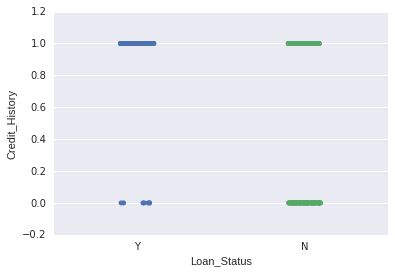

In [454]:
# To visualize the frequency table
import seaborn as sns

sns.stripplot(x='Loan_Status', y='Credit_History', data=train, jitter=True)

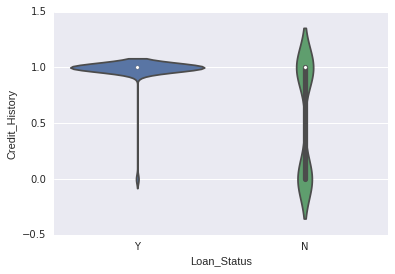

In [455]:
# Try a violin plot, strip plot wasn't the clearest as all answers are either 1 or 0

sns.violinplot(x='Loan_Status', y='Credit_History', data=train)

In [456]:
# Take a look at some other data to find a trend
# Property seems like good colleratoral to fall back on if you can't pay your loan
train.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

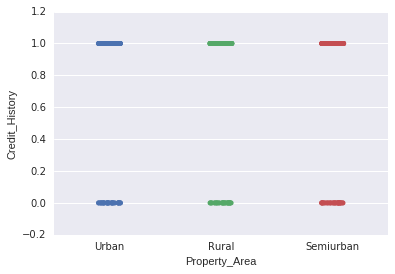

In [457]:
# Try a strip plot
sns.stripplot(x="Property_Area",y="Credit_History", data=train, jitter=True)

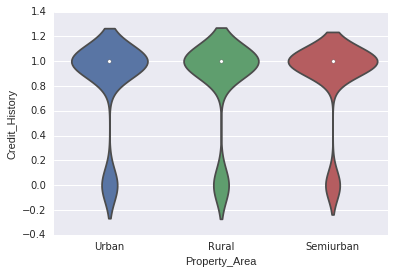

In [458]:
# Strip plot not the most information try a violin plot
sns.violinplot(x="Property_Area",y="Credit_History", data=train)

In [459]:
# Looks like if you have your credit history your very likely to get a loan
# Semi Urban also has the highest chance to produce a credit history, but the trend is not as defined 
# As the credit history to loan status correlation 

# Odds are we could make anyone with a 'Y' loan status have credit history
# Find out how many people have no credit history but a loan

print "Possible 1's for Credit History: " + str(sum((train.Credit_History.isnull()) & (train.Loan_Status == 'Y')))

# Out of curosity let's compare to a random forest classifier 
# Try general prediction of all variables VS Credit History
predsCred = predictnas('Credit_History')
predsCred

Possible 1's for Credit History: 37


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [460]:
# That doesn't seem to back up our assumption, maybe test against less variables?

# First take values where var is NA (test data)
traincopy2 = train.copy()
traincopy2 = traincopy2[traincopy2['Credit_History'].isnull()]
# Drop loan id as it is an object, but not a factor
traincopy2.drop('Loan_ID', axis=1, inplace=True)

# Should check if data is available i.e hasn't already been filled
# If the data has been filled with provide an error otherwise
if sum(traincopy2['Credit_History'].isnull()) == 0:
    print "No NA's present, pick another variable"

# Prep the data
# Want values where the gender is present (training data)

traincopy = train.copy()
traincopy = traincopy[traincopy['Credit_History'].notnull()]
traincopy.drop('Loan_ID', axis=1, inplace=True)


# Factorize train and test data

traincopy = factorizePD(traincopy)
traincopy2 = factorizePD(traincopy2)

# Want the factorized version to test around 
y, _= pd.factorize(traincopy['Credit_History'])
# Take all columns with no NA's
want = traincopy.apply(lambda x: sum(x.isnull())).copy() == 0
# Don't use the variable column 
features = traincopy.columns[want].drop('Credit_History').copy()
# Create initial model
model = RandomForestClassifier(n_estimators=500)
# Fit the model on the original data
model.fit(traincopy[features],y)
# Get predictions on blank data
preds = model.predict(traincopy2[features])
preds


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0])

Feature ranking:
1. feature 10 (0.269992)
2. feature 13 (0.110146)
3. feature 5 (0.106388)
4. feature 7 (0.089593)
5. feature 12 (0.089008)
6. feature 11 (0.082152)
7. feature 6 (0.067498)
8. feature 8 (0.046076)
9. feature 2 (0.044260)
10. feature 9 (0.035317)
11. feature 3 (0.017152)
12. feature 1 (0.016070)
13. feature 4 (0.013880)
14. feature 0 (0.012469)


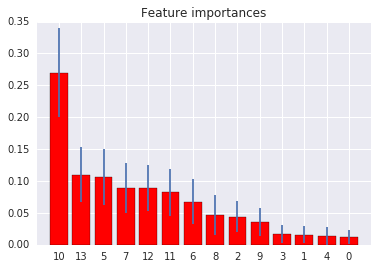

In [461]:
# Not quite there either
# Perhaps we can make a variable importance plot

# Can be either extra trees or random forest 
forest = RandomForestClassifier(n_estimators=250, random_state=0)
y, _= pd.factorize(traincopy['Credit_History'])
want = traincopy.apply(lambda x: sum(x.isnull())).copy() == 0
# Don't use the variable column 
features = traincopy.columns[want].drop('Credit_History').copy()
X = traincopy[features]
forest.fit(X,y)
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [462]:
# Feature 10,13,5,7 seem the most important
print features[[10,13,5,7]]

Index([u'Loan_Status', u'ApplicantIncome_log', u'ApplicantIncome',
       u'LoanAmount'],
      dtype='object')


In [463]:
# Seems like Loan_Status is the most important indicator, might as well go ahead and fill the 
# Yes Loan_Statuses with a 1.0 Credit_History

want = (train.Credit_History.isnull()) & (train.Loan_Status == 'Y')
train.Credit_History[want] = "Y"
print sum(train.Credit_History.isnull())


13


In [464]:
# Let's predict the rest of the values with the best features

# First take values where var is NA (test data)
traincopy2 = train.copy()
traincopy2 = traincopy2[traincopy2['Credit_History'].isnull()]
# Drop loan id as it is an object, but not a factor
traincopy2.drop('Loan_ID', axis=1, inplace=True)

# Should check if data is available i.e hasn't already been filled
# If the data has been filled with provide an error otherwise
if sum(traincopy2['Credit_History'].isnull()) == 0:
    print "No NA's present, pick another variable"

# Prep the data
# Want values where the gender is present (training data)

traincopy = train.copy()
traincopy = traincopy[traincopy['Credit_History'].notnull()]
traincopy.drop('Loan_ID', axis=1, inplace=True)


# Factorize train and test data

traincopy = factorizePD(traincopy)
traincopy2 = factorizePD(traincopy2)

# Want the factorized version to test around 
y, _= pd.factorize(traincopy['Credit_History'])
# Take all columns with no NA's
want = traincopy.apply(lambda x: sum(x.isnull())).copy() == 0
# Don't use the variable column 
features = traincopy.columns[want].drop('Credit_History').copy()[[10,13,5,7]]
# Create initial model
model = RandomForestClassifier(n_estimators=500)
# Fit the model on the original data
model.fit(traincopy[features],y)
# Get predictions on blank data
preds = model.predict(traincopy2[features])
preds


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [465]:
# And fill the rest

for i in preds:
    train.Credit_History.fillna(preds[i], inplace=True)

print train.apply(lambda x: sum(x.isnull()))

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
LoanAmount_log         0
LoanBox                0
ApplicantIncome_log    0
dtype: int64


In [466]:
# Let's create some more features
# Total Income Perhaps

train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train.Total_Income = pd.to_numeric(train.Total_Income, errors='coerce')
#train.Total_Income = train.Total_Income.convert_objects(convert_numeric=True)
train.dtypes

Loan_ID                 object
Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
ApplicantIncome          int64
CoapplicantIncome      float64
LoanAmount             float64
Loan_Amount_Term       float64
Credit_History          object
Property_Area           object
Loan_Status             object
LoanAmount_log         float64
LoanBox                float64
ApplicantIncome_log    float64
Total_Income           float64
dtype: object

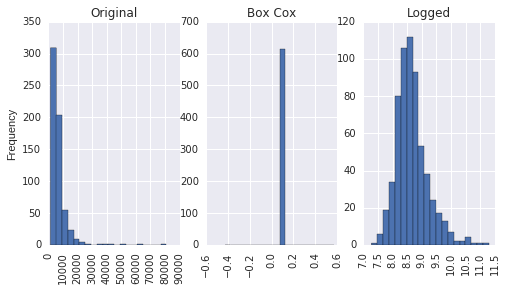

In [467]:
# Looks like log is the best estimator
# For some reason box cox produces only one value 
boxitcompare(train.Total_Income)



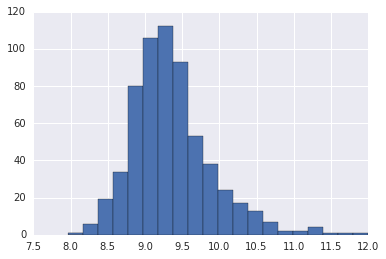

In [468]:
# Apperently if you have data around 0 or negative use the Inverse Hyperbolic Sine Transformation
# http://robjhyndman.com/hyndsight/transformations/
plt.hist(np.arcsinh(train.Total_Income),bins=20)
plt.show()

In [469]:
# Looks more or less the same as the log graph
# Let's use the log
train['Total_Income_Log'] = np.log(train.Total_Income)

In [474]:
# To get ready for predictions let's factorize train now
train.drop('Loan_ID', axis=1, inplace=True)
factorizePD(train)
train.insert(0,'Loan_ID',IDs)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,LoanBox,ApplicantIncome_log,Total_Income,Total_Income_Log
0,LP001002,0,0,0,0,0,5849,0.0,146.412162,360.0,0,0,0,4.986426,6.035000,8.674026,5849.0,8.674026
1,LP001003,0,1,1,0,0,4583,1508.0,128.000000,360.0,0,1,1,4.852030,5.841340,8.430109,6091.0,8.714568
2,LP001005,0,1,0,0,1,3000,0.0,66.000000,360.0,0,0,0,4.189655,4.914615,8.006368,3000.0,8.006368
3,LP001006,0,1,0,1,0,2583,2358.0,120.000000,360.0,0,0,0,4.787492,5.749027,7.856707,4941.0,8.505323
4,LP001008,0,0,0,0,0,6000,0.0,141.000000,360.0,0,0,0,4.948760,5.980529,8.699515,6000.0,8.699515


In [475]:
#This is an alternative way to factorize the dataframe:

#from sklearn.preprocessing import LabelEncoder

# Choose all columns with categorical variables with string inputs

#var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

# Create label encoder
#le = LabelEncoder()

# Run through each column

#for i in var_mod:
#    df[i] = le.fit_transform(df[i])
#df.dtypes 


In [476]:
# Import some models for Machine Learning Analysis
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [478]:
# Generic Function for Making a classification 

def classification_model(model, data, predictors, outcome):
    # Fit the model
    model.fit(data[predictors],data[outcome])
    
    # Make predictions on training set
    predictions = model.predict(data[predictors])
    
    # Print Accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print "Accuracy : %s" % "{0:.3%}".format(accuracy)
    
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

    print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))
    
    # Fit the model again so that it can be refered out side of the function
    model.fit(data[predictors],data[outcome])


In [479]:
train.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status', u'LoanAmount_log', u'LoanBox', u'ApplicantIncome_log',
       u'Total_Income', u'Total_Income_Log'],
      dtype='object')

In [481]:
# Let's use a random forest first and get a variable importance scale

model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanBox','Total_Income_Log']
outcome_var = 'Loan_Status'
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 81.434%


In [484]:
# 100 % accuracy shows overfitting
# Should reduce this through reducing the number of predictors
# and tuning model parameters

# Check out attributes of the model:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__getitem__',
 '__hash__',
 '__init__',
 '__iter__',
 '__len__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_get_param_names',
 '_make_estimator',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'class_weight',
 'classes_',
 'criterion',
 'estimator_params',
 'estimators_',
 'feature_importances_',
 'fit',
 'fit_transform',
 'get_params',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_classes_',
 'n_estimators',
 'n_features_',
 'n_jobs',
 'n_outputs_',
 'oob_score',

In [485]:
# Want to focus on feature importances
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print featimp

Credit_History      0.286040
Total_Income_Log    0.251765
LoanBox             0.218059
Dependents          0.057994
Loan_Amount_Term    0.048841
Property_Area       0.046158
Married             0.024295
Education           0.024288
Gender              0.022948
Self_Employed       0.019611
dtype: float64


In [500]:
# We will use the top 5 to predict upon
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7,
                              max_features=1)
predictor_var = ['Credit_History','Total_Income_Log','LoanBox','Dependents','Loan_Amount_Term']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 84.691%
Cross-Validation Score : 81.918%


In [501]:
# Let's try a regression model
model = LogisticRegression()
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 64.007%
Cross-Validation Score : 63.842%


In [502]:
# And a decision tree model
model=DecisionTreeClassifier()
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 74.598%


In [503]:
# Seems over fit again 
predictor_var=['Credit_History','Loan_Amount_Term','LoanBox']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 90.879%
Cross-Validation Score : 75.238%


In [ ]:
# Article on cross validation
# http://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/
# http://robjhyndman.com/hyndsight/crossvalidation/